## Logistic regression Part B -Diabetic

In [1]:
## Database Phase
import pandas as pd
import numpy as np

# Machine Learning Phase
import statsmodels.api as sm
import sklearn 
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, f1_score, precision_score,confusion_matrix, accuracy_score,roc_auc_score,classification_report,roc_curve

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Diabetic dataframe
df=pd.read_csv("Diabetes_Dataset.csv")
df.shape

(1000, 14)

In [3]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
2,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
4,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
# check null value 
df.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [6]:
# check statistical description
df.describe().round(decimals=2)

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,340.50,270551.41,53.53,5.12,68.94,8.28,4.86,2.35,1.20,2.61,1.85,29.58
std,240.40,3380757.82,8.80,2.94,59.98,2.53,1.30,1.40,0.66,1.12,3.66,4.96
min,1.00,123.00,20.00,0.50,6.00,0.90,0.00,0.30,0.20,0.30,0.10,19.00
25%,125.75,24063.75,51.00,3.70,48.00,6.50,4.00,1.50,0.90,1.80,0.70,26.00
50%,300.50,34395.50,55.00,4.60,60.00,8.00,4.80,2.00,1.10,2.50,0.90,30.00
75%,550.25,45384.25,59.00,5.70,73.00,10.20,5.60,2.90,1.30,3.30,1.50,33.00
max,800.00,75435657.00,79.00,38.90,800.00,16.00,10.30,13.80,9.90,9.90,35.00,47.75


In [7]:
# check column
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [8]:
# check the categorical features
catg_features=[col for col in df.columns if ((df[col].dtypes=='O') & (col not in ['CLASS']))]
print(catg_features)

['Gender']


In [9]:
# check the numerical features
num_features=[col for col in df.columns if ((df[col].dtypes!='O') & (col not in ['CLASS']))]
print(num_features)

['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


In [10]:
# filtering out Diabetic P
df[df['CLASS']!='P'].shape

(947, 14)

In [11]:
df1=df[df['CLASS']!='P']
df1.shape

(947, 14)

In [12]:
# defining colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

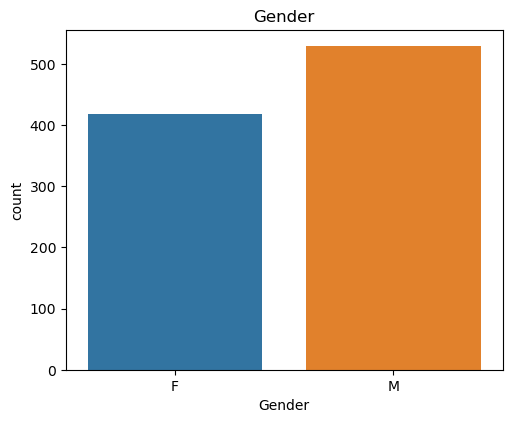

In [13]:
## Univariant analysis of categorical variables -Gender
plt.figure(figsize=(80,15), facecolor='white')
plotnumber = 1
for features in catg_features:
    ax = plt.subplot(3, 12, plotnumber)
    sns.countplot(x=features, data=df1, palette=colors)
    plt.xlabel(features)
    plt.title(features)
    plotnumber += 1
plt.show()

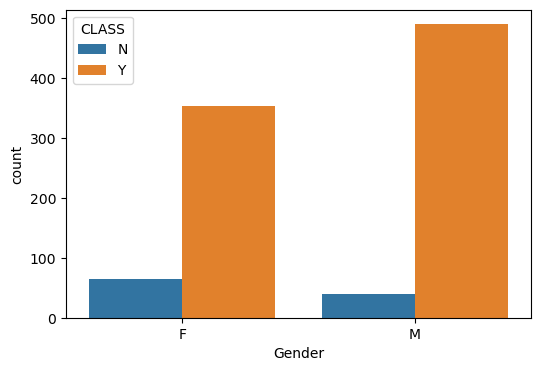

In [15]:
# plot relationship between catgeorical features and target column deposit -Gender Vs Class
def create_countplot(data, feature, palette):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='CLASS', data=data, palette=palette)
#     plt.savefig(save_path)
    plt.show()

# Loop over the categorical features and call the function for each one
for feature in catg_features:
#     save_path = f'images/deposit/{feature}VSdeposit.png'
    create_countplot(df1, feature, colors) # save_path

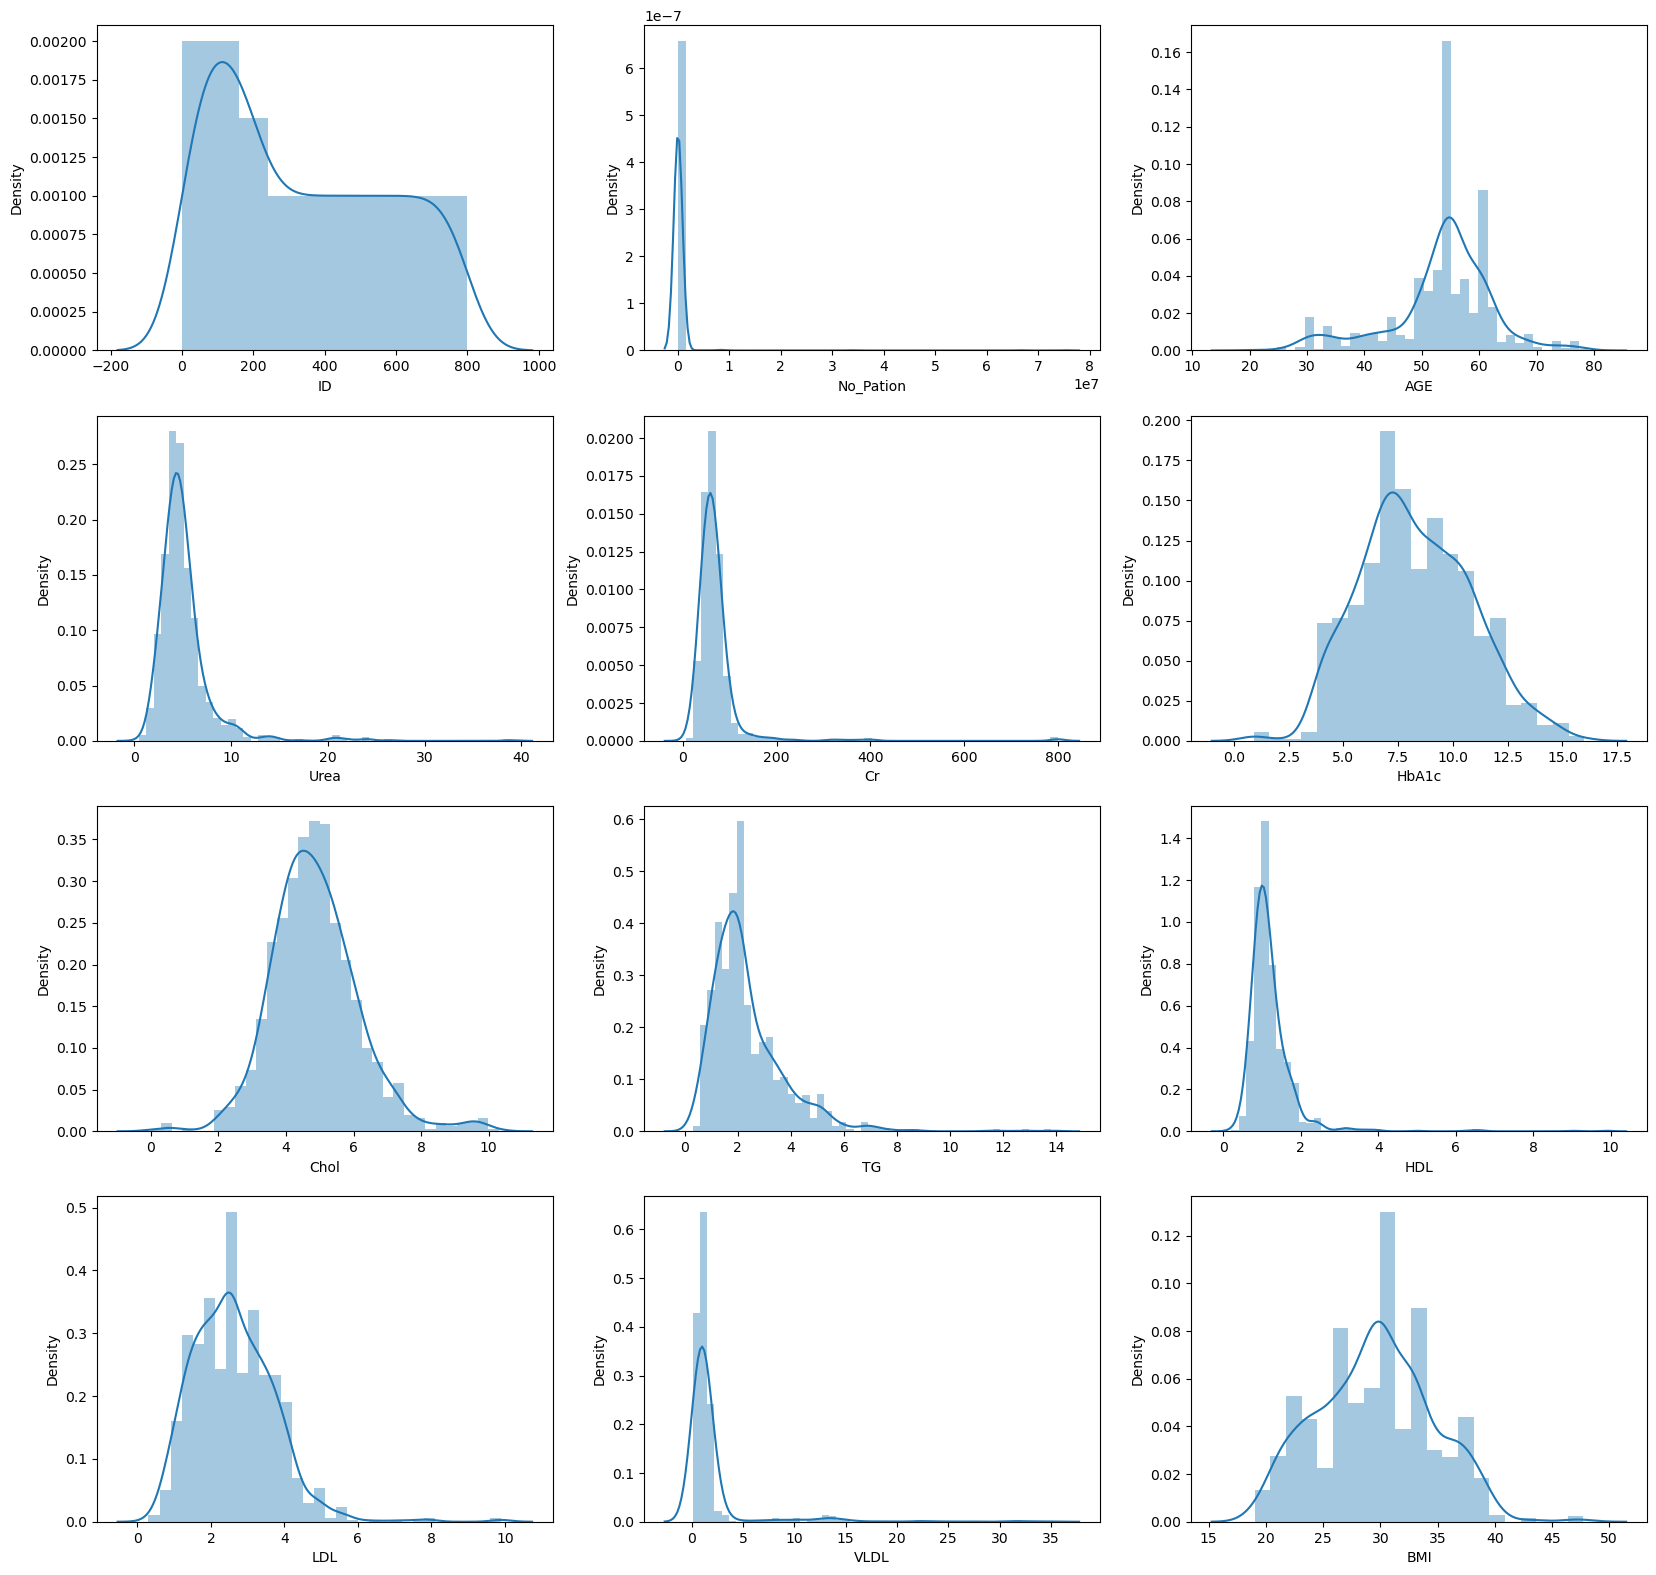

In [15]:
# univariant analysis of numerical features -'ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI'
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
colors = ['#1f77b4', '#ff7f0e']
for num_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_feature],color=colors[0])
    plt.xlabel(num_feature)
    plotnumber+=1
# plt.savefig('images/deposit/num_analysis.png')
plt.show()

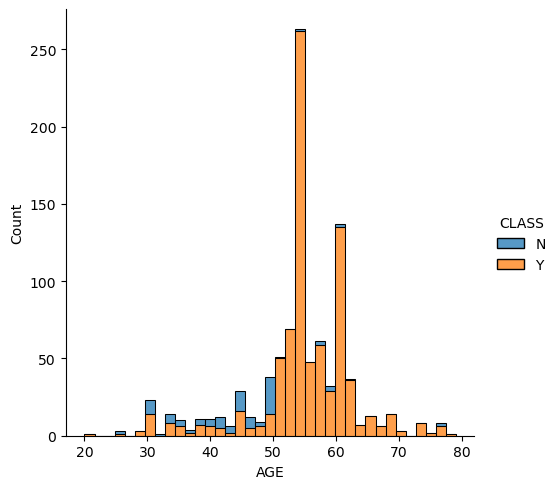

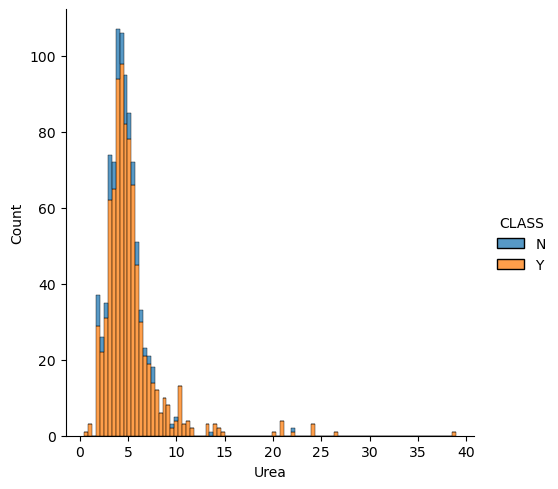

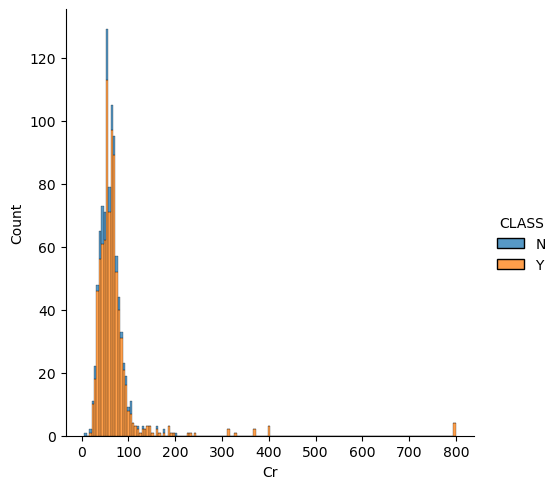

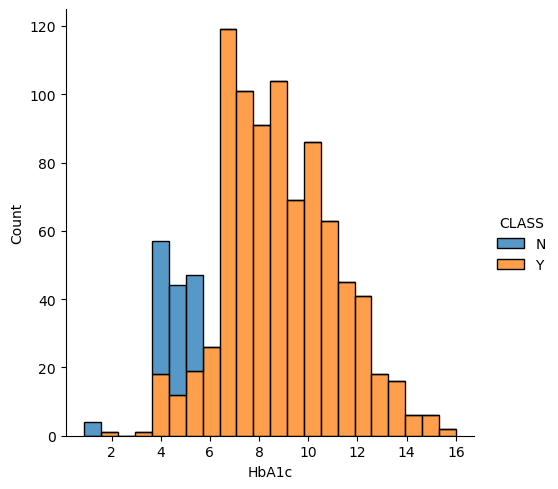

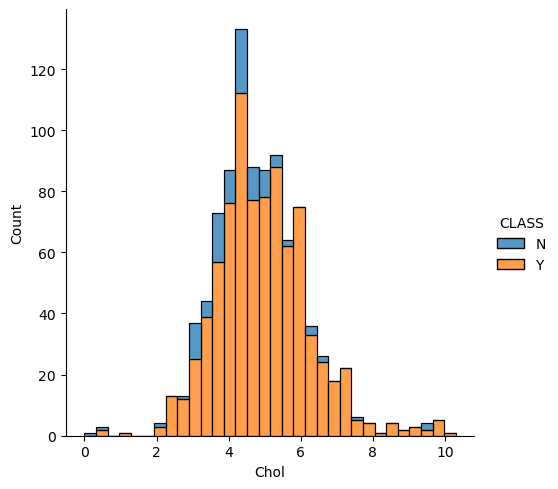

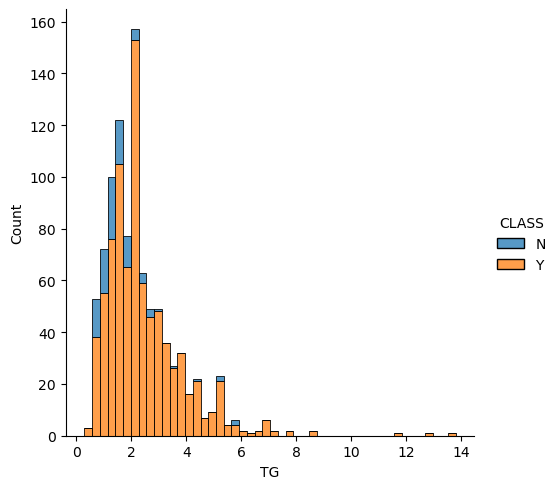

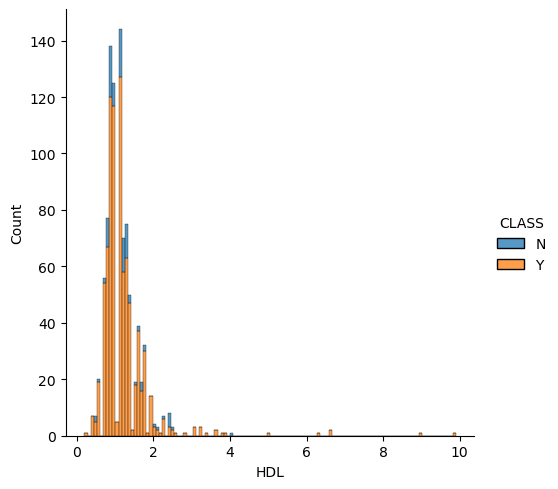

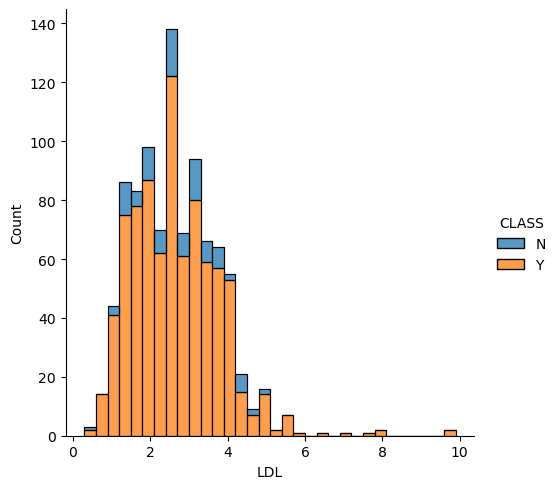

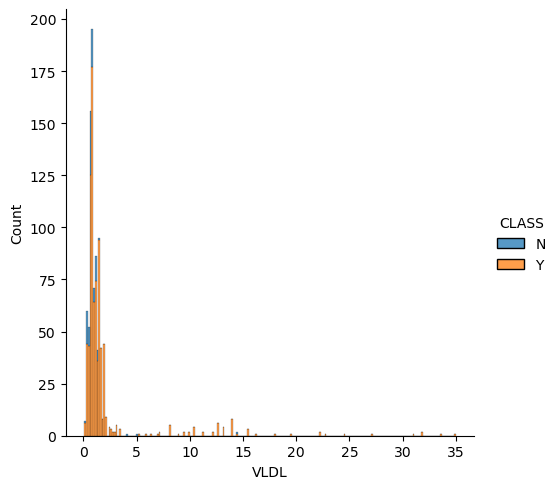

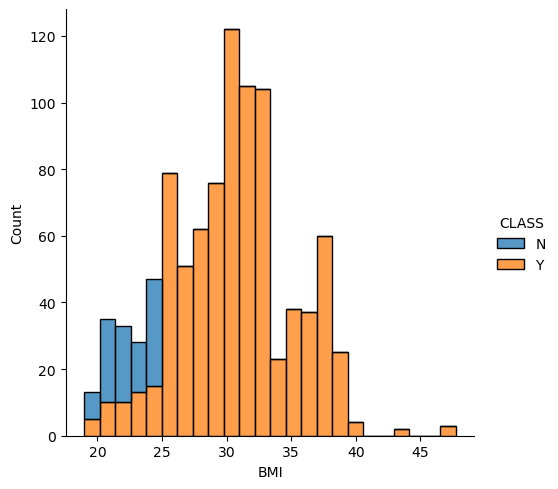

In [16]:
# plot relationship between numerical features and target column deposit
num_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Plot histograms for all numerical features with respect to the target variable
for col in num_cols:
    sns.displot(data=df1, x=col, hue="CLASS", multiple="stack")
    plt.show()

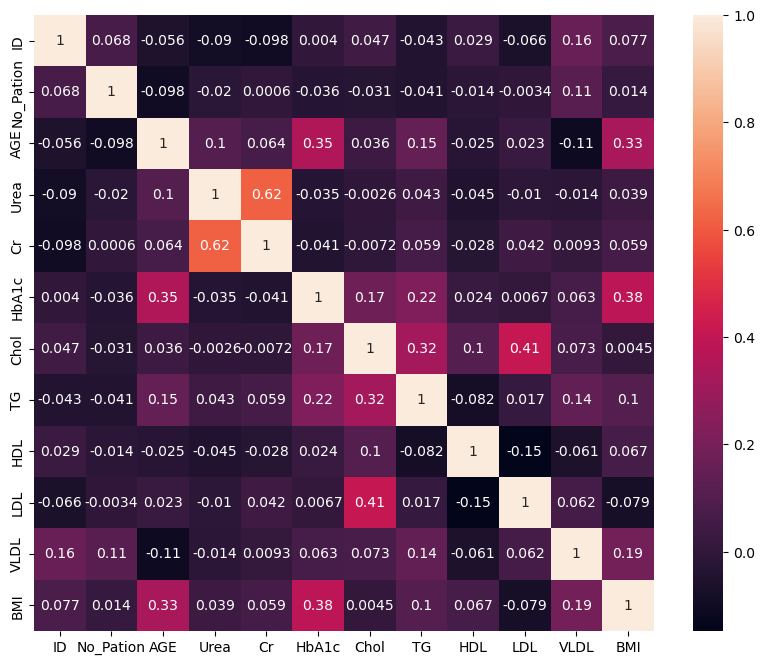

In [17]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot = True)
plt.show()

## Detecting Outlier and Treating 

Number of outliers before removing outliers:
AGE: 55 outliers
Urea: 44 outliers
Cr: 18 outliers
HbA1c: 6 outliers
Chol: 9 outliers
TG: 37 outliers
HDL: 32 outliers
LDL: 3 outliers
VLDL: 31 outliers
BMI: 0 outliers


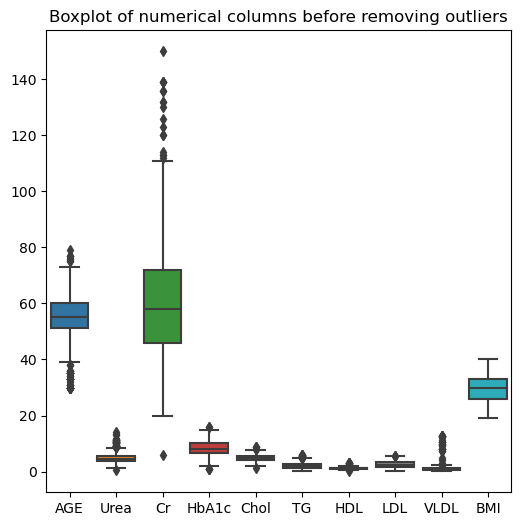

Number of rows after removing outliers: 749

Number of outliers after removing outliers:
AGE: 45 outliers
Urea: 29 outliers
Cr: 5 outliers
HbA1c: 6 outliers
Chol: 5 outliers
TG: 34 outliers
HDL: 15 outliers
LDL: 2 outliers
VLDL: 7 outliers
BMI: 0 outliers


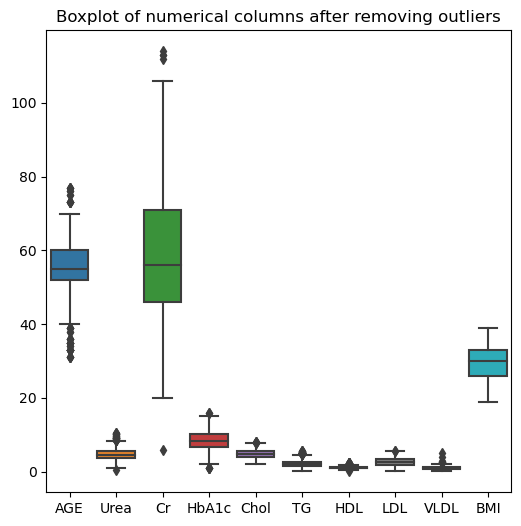

In [17]:
# Select all numerical columns
num_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Count number of outliers in each column before removing outliers
print("Number of outliers before removing outliers:")
for col in num_cols:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate upper and lower bounds for outliers
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    
    # Count number of outliers in each column
    num_outliers = len(df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)])
    print(f"{col}: {num_outliers} outliers")

# Visualize boxplot of numerical columns before removing outliers
plt.figure(figsize=(6, 6))
sns.boxplot(data=df1[num_cols])
plt.title("Boxplot of numerical columns before removing outliers")
plt.show()

# Remove outliers using z-score method
for col in num_cols:
    z_scores = stats.zscore(df1[col])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df1 = df1[filtered_entries]

# Check number of rows after removing outliers
print("Number of rows after removing outliers:", len(df1))

# Count number of outliers in each column after removing outliers
print("\nNumber of outliers after removing outliers:")
for col in num_cols:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate upper and lower bounds for outliers
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    
    # Count number of outliers in each column
    num_outliers = len(df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)])
    print(f"{col}: {num_outliers} outliers")

# Visualize boxplot of numerical columns after removing outliers
plt.figure(figsize=(6, 6))
sns.boxplot(data=df1[num_cols])
plt.title("Boxplot of numerical columns after removing outliers")
plt.show()

## Convert categorical to numeric

In [20]:
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['CLASS'] = label_encoder.fit_transform(df1['CLASS'])

# Split data

In [21]:
# Define the target variable
y = df1['CLASS']
# Define the independent variables
X = df1.drop(columns=['CLASS', 'ID', 'No_Pation'])

## Feature selection using p-value

In [23]:
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit a logistic regression model using statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()
# Print the summary of the model
print(result.summary())
# Get the p-values of each independent variable
p_values = result.pvalues.drop('const')
p_values = p_values.sort_values(ascending=False)

# Select the independent variables with p-values less than 0.05
selected_cols = list(p_values[p_values < 0.05].index)

# Print the selected columns
print("Selected columns based on p-values:")
print(selected_cols)

Optimization terminated successfully.
         Current function value: 0.047438
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  CLASS   No. Observations:                  834
Model:                          Logit   Df Residuals:                      822
Method:                           MLE   Df Model:                           11
Date:                Wed, 10 May 2023   Pseudo R-squ.:                  0.8643
Time:                        01:22:13   Log-Likelihood:                -39.563
converged:                       True   LL-Null:                       -291.62
Covariance Type:            nonrobust   LLR p-value:                4.260e-101
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.2069      8.749     -5.624      0.000     -66.355     -32.058
Gender         0.6981      0

In [24]:
significant_features = ['LDL', 'TG', 'Chol', 'HbA1c', 'BMI']

## Scaling selected Features

In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[significant_features])

## Train Test Spliting

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# logistics using sk-learn
## Logistic Regression
logistic_model = LogisticRegression(random_state=30)
logistic_model=logistic_model.fit(X_train,y_train)
#Making prediction
y_pred_lg = logistic_model.predict(X_test)
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:,1]

In [31]:
recall_score_sk= recall_score(y_test, y_pred_lg)
print("Recall_Score : ", recall_score_sk)
precision_score_sk= precision_score(y_test, y_pred_lg)
print("precision_score : ", precision_score_sk)
f1_score_sk= f1_score(y_test, y_pred_lg)
print("f1_Score :", f1_score_sk)
accuracy_score_sk= accuracy_score(y_test, y_pred_lg)
print("Accuracy_Score :",accuracy_score_sk)
roc_auc_score_sk = roc_auc_score(y_pred_lg, y_test)
print("ROC_AUC Score:",roc_auc_score_sk)

Recall_Score :  0.9930555555555556
precision_score :  0.9533333333333334
f1_Score : 0.9727891156462586
Accuracy_Score : 0.9520958083832335
ROC_AUC Score: 0.9472549019607843


In [33]:
print(classification_report(y_pred_lg, y_test))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.99      0.95      0.97       150

    accuracy                           0.95       167
   macro avg       0.84      0.95      0.89       167
weighted avg       0.96      0.95      0.96       167



In [34]:
cm = confusion_matrix(y_test, y_pred_lg)

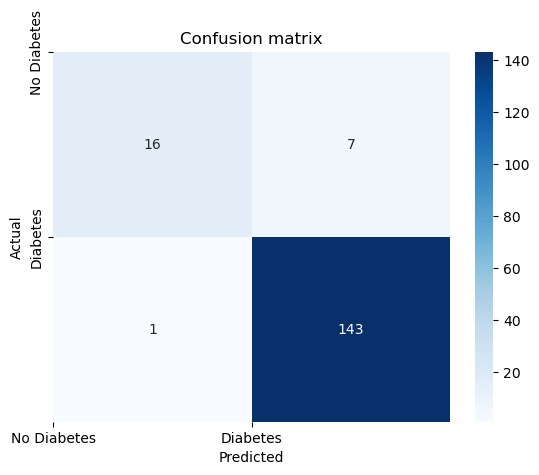

In [37]:
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

## Apply model to Class=='P'

In [39]:
X_test_p = df[df['CLASS'] == 'P'][selected_cols]
y_pred_p = logreg.predict(X_test_p)
y_true_p = [1] * len(X_test_p)
accuracy_p = accuracy_score(y_true_p, y_pred_p)
print("Accuracy on 'P' cases:", accuracy_p)

Accuracy on 'P' cases: 1.0
